In [ ]:
# dataset link https://www.kaggle.com/datasets/blastchar/telco-customer-churn?resource=download

# Importing libraries



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing dataset

In [ ]:
ds=pd.read_csv('Churn.csv')
ds.sample(4)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1497,3128-YOVTD,Female,0,Yes,Yes,51,Yes,No,Fiber optic,Yes,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.15,4018.55,No
178,5947-SGKCL,Female,0,Yes,Yes,15,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),105.35,1559.25,No
558,2501-XWWTZ,Male,0,No,No,11,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,No,Electronic check,70.20,760.05,No
2028,4452-ROHMO,Female,0,No,No,15,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.60,331.6,No


# Data Exploration and Modification

In [ ]:
ds.drop('customerID',axis='columns',inplace=True)
ds.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1106,Female,0,No,No,63,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Two year,No,Bank transfer (automatic),97.45,6253,No
2908,Male,0,Yes,No,18,Yes,Yes,Fiber optic,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.40,1742.95,Yes
5480,Female,0,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,45.40,45.4,No
4876,Male,0,No,No,10,Yes,No,Fiber optic,Yes,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,104.40,1081.45,Yes


In [ ]:
tenure_churn_no = ds1[ds1.Churn==0].tenure
tenure_churn_yes = ds1[ds1.Churn==1].tenure
plt.hist([tenure_churn_yes, tenure_churn_no],label=['Leaving','Staying'])
plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")
plt.legend()

In [ ]:
for c in ds:
   print(c, ds[c].unique())

gender ['Female' 'Male']
SeniorCitizen [0 1]
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges ['29.85' '1889

# Encoding data

In [ ]:
col_trnsf=['InternetService','Contract','PaymentMethod']

In [ ]:
ds1 = pd.get_dummies(data=ds, columns=col_trnsf)
ds1.sample(8)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2142,Female,0,No,Yes,21,Yes,No,Yes,No,Yes,...,True,False,False,False,True,False,False,False,False,True
3267,Male,0,Yes,Yes,47,Yes,No,No internet service,No internet service,No internet service,...,False,False,True,False,True,False,False,False,False,True
269,Female,0,Yes,No,71,Yes,Yes,No internet service,No internet service,No internet service,...,False,False,True,False,False,True,False,True,False,False
1420,Female,0,Yes,No,60,Yes,Yes,No,Yes,No,...,False,True,False,True,False,False,False,False,True,False
1676,Female,0,No,No,4,Yes,Yes,Yes,No,No,...,False,True,False,True,False,False,False,False,True,False
4012,Female,0,No,No,1,Yes,No,No,Yes,No,...,True,False,False,True,False,False,False,False,True,False
5210,Male,0,Yes,No,53,No,No phone service,No,Yes,Yes,...,True,False,False,False,True,False,False,False,True,False
5649,Female,0,Yes,No,33,Yes,No,No internet service,No internet service,No internet service,...,False,False,True,True,False,False,False,False,False,True


In [ ]:
ds1.replace('Female',0,inplace=True)
ds1.replace('Male',1, inplace=True)
ds1.replace(True,1,inplace=True)
ds1.replace(False,0,inplace=True)
ds1.replace('Yes',1, inplace=True)
ds1.replace('No',0, inplace=True)
ds1.replace('No internet service',0, inplace=True)
ds1.replace('No phone service',0, inplace=True)
ds1.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1529,0,0,1,0,59,1,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
2821,1,1,1,0,1,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
1432,1,0,0,0,35,1,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0
257,1,0,0,0,50,1,1,1,1,1,...,0,1,0,0,1,0,0,1,0,0
5476,0,1,0,0,5,1,0,0,0,1,...,0,1,0,1,0,0,0,0,0,1


In [ ]:
for c in ds1:
   print(c, ds1[c].unique())

gender [0 1]
SeniorCitizen [0 1]
Partner [1 0]
Dependents [0 1]
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService [0 1]
MultipleLines [0 1]
OnlineSecurity [0 1]
OnlineBackup [1 0]
DeviceProtection [0 1]
TechSupport [0 1]
StreamingTV [0 1]
StreamingMovies [0 1]
PaperlessBilling [1 0]
MonthlyCharges [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn [0 1]
InternetService_DSL [1 0]
InternetService_Fiber optic [0 1]
InternetService_No [0 1]
Contract_Month-to-month [1 0]
Contract_One year [0 1]
Contract_Two year [0 1]
PaymentMethod_Bank transfer (automatic) [0 1]
PaymentMethod_Credit card (automatic) [0 1]
PaymentMethod_Electronic check [1 0]
PaymentMethod_Mailed check [0 1]


# Remove missing data and scaling

In [ ]:
ds1.dtypes
ds1=ds1[ds1.TotalCharges!=' ']
ds1.shape

(7032, 27)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cols_to_scale=['tenure','MonthlyCharges','TotalCharges']
ds1[cols_to_scale] = scaler.fit_transform(ds1[cols_to_scale])
ds1.sample(8)

<ipython-input-140-3adab0fa2903>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds1[cols_to_scale] = scaler.fit_transform(ds1[cols_to_scale])


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2253,1,1,1,0,1.000000,1,0,1,1,1,...,1,0,0,0,0,1,1,0,0,0
2694,1,0,1,1,0.098592,1,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
6862,0,1,0,0,0.042254,1,1,0,0,1,...,0,1,0,1,0,0,0,0,1,0
6463,1,0,1,0,0.816901,1,1,1,0,0,...,1,0,0,0,1,0,0,0,0,1
5476,0,1,0,0,0.056338,1,0,0,0,1,...,0,1,0,1,0,0,0,0,0,1
6060,0,1,0,0,0.098592,1,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
1001,1,1,1,0,0.366197,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
3880,1,0,1,1,0.352113,1,1,0,0,1,...,1,0,0,0,1,0,0,1,0,0


In [ ]:
X = ds1.drop('Churn',axis='columns')
X = X.iloc[:,:].values
y = ds1['Churn'].values
print(y.shape)

(7032,)


In [ ]:
for c in ds1:
   print(c, ds1[c].unique())

gender [0 1]
SeniorCitizen [0 1]
Partner [1 0]
Dependents [0 1]
tenure [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService [0 1]
MultipleLines [0 1]
OnlineSecurity [0 1]
OnlineBackup [1 0]
DeviceProtection [0 1]
TechSupport [0 1]
Stream

# Splitting dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)
print(y_train)
X_train = X_train.astype(np.float32)
y_train = y_train.astype(np.float32)
print(X_train)

[0 0 0 ... 1 1 1]
[[0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 1.]
 [1. 0. 1. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 0. 1.]
 [1. 1. 0. ... 0. 1. 0.]]


# Applying ANN model

In [ ]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(19,input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 1s 2ms/step - loss: 0.5234 - accuracy: 0.7344
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4351 - accuracy: 0.7924
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4272 - accuracy: 0.7972
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4234 - accuracy: 0.8000
Epoch 5/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4204 - accuracy: 0.8009
Epoch 6/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4178 - accuracy: 0.8004
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4166 - accuracy: 0.8080
Epoch 8/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4146 - accuracy: 0.8080
Epoch 9/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4133 - accuracy: 0.8107
Epoch 10/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4121 - accura

# Predicting values

In [ ]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

44/44 [==============================] - 0s 2ms/step


In [ ]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [0 0]
 ...
 [0 1]
 [0 0]
 [0 0]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[928 113]
 [181 185]]


0.7910447761194029

Text(50.722222222222214, 0.5, 'Truth')

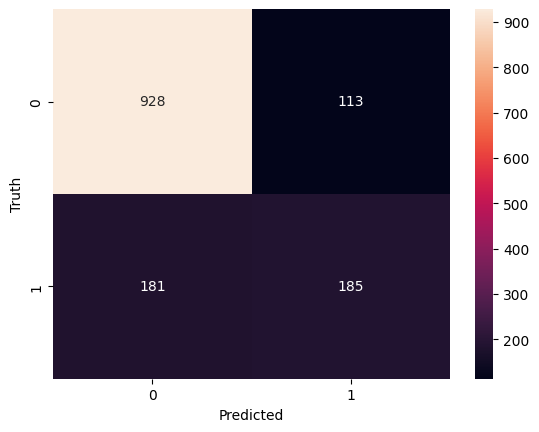

In [ ]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')